In [1]:
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt
import numpy as np

1. Для реализованной модели градиентного бустинга построить графики зависимости ошибки от количества деревьев в ансамбле и от максимальной глубины деревьев. Сделать выводы о зависимости ошибки от этих параметров.

In [2]:
X, y = load_diabetes(return_X_y=True)
X.shape, y.shape

((442, 10), (442,))

In [3]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25)

In [4]:
def gb_predict(X, trees_list, eta):     
    predictions = np.array(
        [sum([eta * alg.predict([x])[0] for alg in trees_list]) for x in X]
    )
    return predictions

In [5]:
def mean_squared_error(y_real, prediction):
    return (sum((y_real - prediction)**2)) / len(y_real)

In [6]:
def residual(y, z):
    return - (z - y)

In [7]:
def gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, eta):
    
    # Деревья будем записывать в список
    trees = []
    
    # Будем записывать ошибки на обучающей и тестовой выборке на каждой итерации в список
    train_errors = []
    test_errors = []
    
    for i in range(n_trees):
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)

        # первый алгоритм просто обучаем на выборке и добавляем в список
        if len(trees) == 0:
            # обучаем первое дерево на обучающей выборке
            tree.fit(X_train, y_train)
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, eta)))
        else:
            # Получим ответы на текущей композиции
            target = gb_predict(X_train, trees, eta)
            
            # алгоритмы начиная со второго обучаем на сдвиг
            tree.fit(X_train, residual(y_train, target))
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, eta)))

        trees.append(tree)
        
    return trees, train_errors, test_errors

In [8]:
def plot_depth_err(max_depth, X_train, X_test, y_train, y_test):
    eta = 1
    n_trees = 3
    depth = 0

    train_errors_list = []
    test_errors_list = []
    n_depth = []

    while depth < max_depth:
        depth +=1

        trees, train_errors, test_errors = gb_fit(n_trees, depth, X_train, X_test, y_train, y_test, eta)

        train_prediction = gb_predict(X_train, trees, eta)
        test_prediction = gb_predict(X_test, trees, eta)

        train_errors_list.append(mean_squared_error(y_train, train_prediction))
        test_errors_list.append(mean_squared_error(y_test, test_prediction)) 

        n_depth.append(depth)
    
    return (plt.plot(n_depth, train_errors_list, label='train'),
            plt.plot(n_depth, test_errors_list, label='test'),
            plt.legend(loc='center right'),
            plt.xlabel('depth'),
            plt.ylabel('error'))

([<matplotlib.lines.Line2D at 0x7fa0a019ef70>],
 Text(0.5, 0, 'depth'),
 Text(0, 0.5, 'error'))

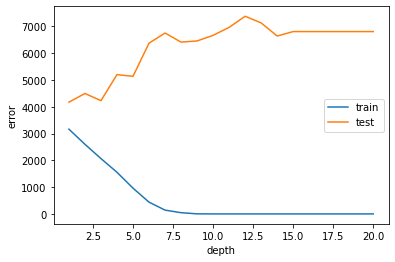

In [9]:
plot_depth_err(20, X_train, X_test, y_train, y_test)

In [10]:
def plot_ntrees_err(max_ntrees, X_train, X_test, y_train, y_test):
    eta = 1
    n_trees = 0
    depth = 3

    train_errors_list = []
    test_errors_list = []
    trees_count = []

    while n_trees < max_ntrees:
        n_trees +=1

        trees, train_errors, test_errors = gb_fit(n_trees, depth, X_train, X_test, y_train, y_test, eta)

        train_prediction = gb_predict(X_train, trees, eta)
        test_prediction = gb_predict(X_test, trees, eta)

        train_errors_list.append(mean_squared_error(y_train, train_prediction))
        test_errors_list.append(mean_squared_error(y_test, test_prediction)) 

        trees_count.append(n_trees)
    
    return (plt.plot(trees_count, train_errors_list, label='train'),
            plt.plot(trees_count, test_errors_list, label='test'),
            plt.legend(loc='center right'),
            plt.xlabel('trees'),
            plt.ylabel('error'))

([<matplotlib.lines.Line2D at 0x7fa0a01469d0>],
 Text(0.5, 0, 'trees'),
 Text(0, 0.5, 'error'))

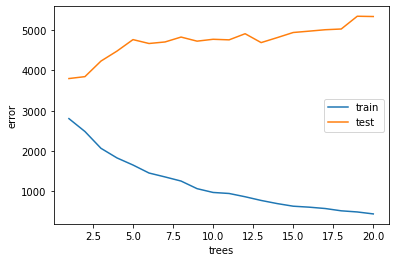

In [11]:
plot_ntrees_err(20, X_train, X_test, y_train, y_test)

In [12]:
# модель переобучаестя при увелечение количества и глубины деревьев